<a href="https://colab.research.google.com/github/ChikoAbillaBasya/Pembelajaran-Mesin/blob/main/Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum 1**
---

[dataset.csv](https://3041032130-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2F5CvtE8Xh9b75jKUaRr5Y%2Fuploads%2FVja4unHv0YamOlZiV1L6%2Fdataset.csv?alt=media&token=97e5d863-0129-441b-9253-85714379fde9)

⬆️ Download Dataset Terlebih Dahulu ⬆️

Berikut adalah langkah-langkah beserta penjelasan singkat dan snapshot kode program Python untuk melakukan praktikum regresi linier, mengacu pada kode program yang telah diberikan sebelumnya:

**Langkah 1: Persiapan Data**

* Download dan letakkan file data yang akan digunakan pada direktori yang sama. Pastikan data telah disimpan dalam format CSV.

**Langkah 2: Import Library**

In [2]:
# import package
import numpy as np
import pandas as pd

* Import library NumPy dan Pandas yang digunakan untuk manipulasi data.

**Langkah 3: Baca Data**

In [3]:
# baca data dari file CSV
data = pd.read_csv('dataset.csv')

* Baca data dari file CSV dengan menggunakan Pandas.

**Langkah 4: Pemahaman Terhadap Data**

In [4]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


* Tampilkan beberapa data awal, ukuran data, informasi data, dan deskripsi statistik data untuk memahami karakteristik data.

**Langkah 5: Visualisasi Data**

In [5]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

* Import library Matplotlib dan Seaborn untuk visualisasi data.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


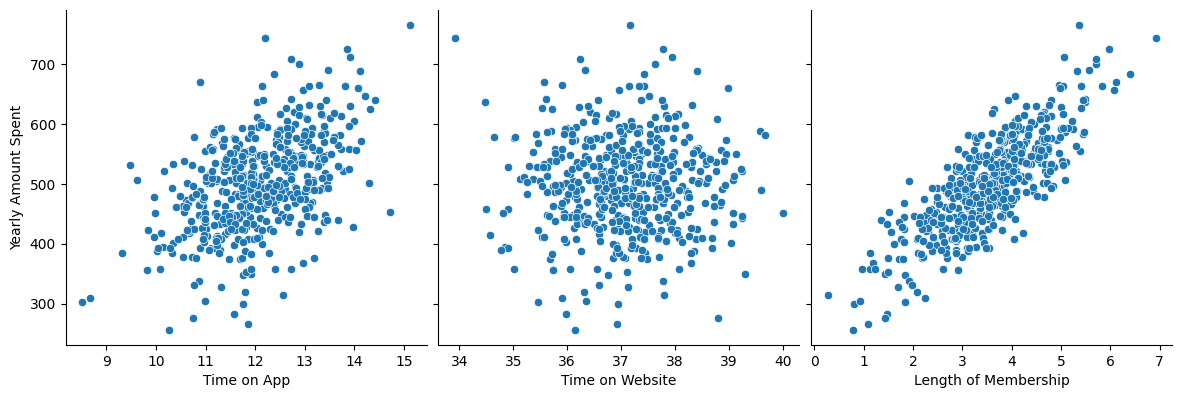

In [6]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

* Gunakan pairplot untuk menampilkan hubungan antara variabel bebas dan variabel target dalam bentuk scatter plot.

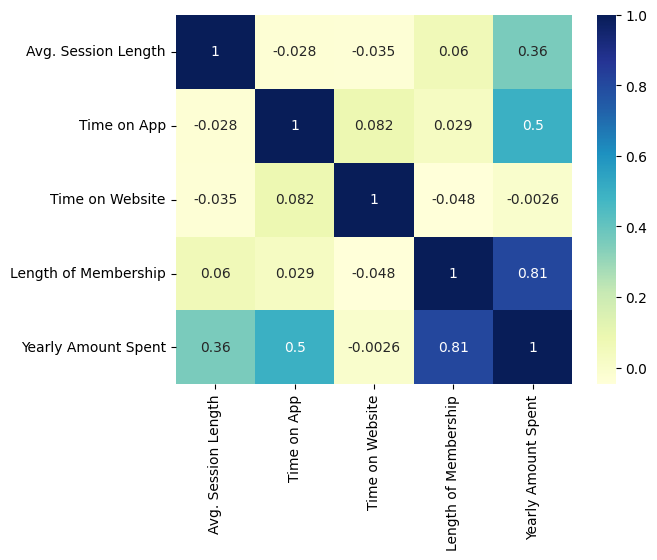

In [7]:
# visualisasi korelasi dengan heatmap
sns.heatmap(data.select_dtypes(include=np.number).corr(), cmap="YlGnBu", annot=True)
plt.show()

* Gunakan heatmap untuk menampilkan matriks korelasi antara variabel-variabel dalam dataset. Semakin tinggi nilainya, semakin tinggi korelasinya.

**Langkah 6: Regresi Linier**

In [8]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = data['Length of Membership']
y = data['Yearly Amount Spent']

* Pisahkan variabel bebas (X) dan variabel target (y).

In [9]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

* Bagi data menjadi data latih (70%) dan data uji (30%) menggunakan train_test_split.
* Lakukan training model regresi linier menggunakan library StatsModels. Tambahkan konstanta (intercept) ke variabel bebas.

In [10]:
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

* Visualisasikan garis regresi pada data latih.

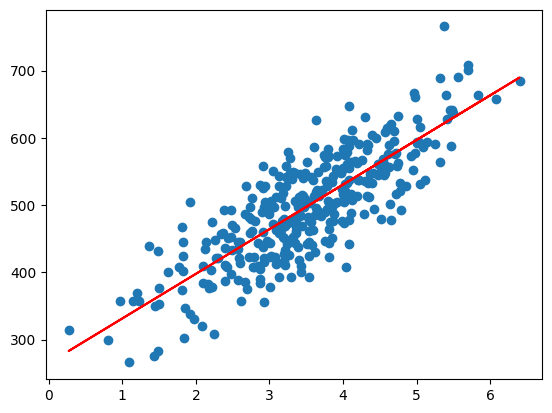

In [11]:
# Visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

**Langkah 7: Analisis Residual**

In [12]:
# Prediksi nilai y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

# Menghitung residual
res = (y_train - y_train_pred)

* Lakukan prediksi nilai y dari data latih dan hitung residual (selisih antara nilai sebenarnya dan nilai prediksi).

/tmp/ipython-input-594495671.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


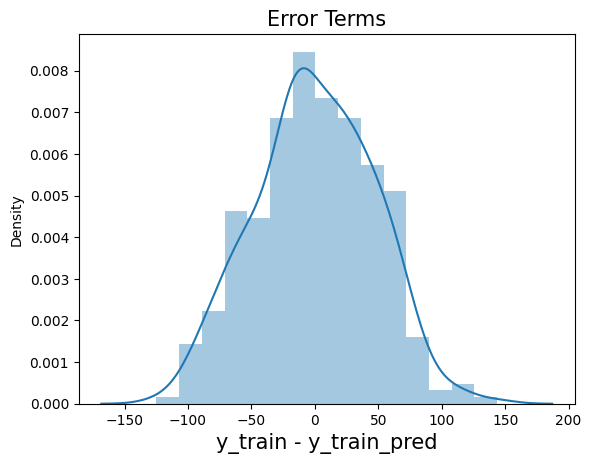

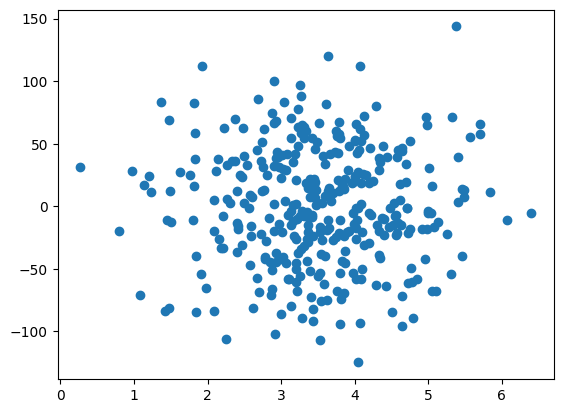

In [13]:
# Histogram residual
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

* Visualisasikan residual dalam bentuk histogram dan scatter plot untuk mengevaluasi distribusi dan pola error.

**Langkah 8: Prediksi pada Data Uji dan Evaluasi Model**

In [14]:
# Prediksi pada data uji
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

* Lakukan prediksi pada data uji.

In [15]:
# Hitung nilai R-squared
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

* Hitung nilai R-squared untuk mengukur kinerja model pada data uji.

**Langkah 9: Visualisasi Hasil**

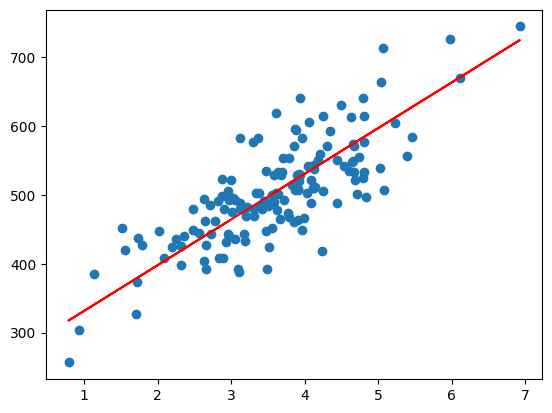

In [16]:
# Visualisasi data uji dan hasil prediksi
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

* Visualisasikan data uji dan hasil prediksi dalam bentuk scatter plot.

Dengan mengikuti langkah-langkah di atas, Anda dapat melakukan analisis regresi linier pada data Anda, mengukur kinerja model, dan memvisualisasikan hasilnya.

# **Praktikum 2**
---

[Posisi_gaji.csv](https://3041032130-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2F5CvtE8Xh9b75jKUaRr5Y%2Fuploads%2FJ8KhV6si1Rx1hMNHJmx3%2FPosisi_gaji.csv?alt=media&token=01084995-6754-45a9-b727-e382bcf70e97)

⬆️ Download Dataset Terlebih Dahulu ⬆️

**1. Mengimpor Library:**

Lakukan import library yang diperlukan terlebih dahulu, termasuk NumPy, Matplotlib, dan pandas.

In [17]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**2. Mengimpor Dataset:**

* Pastikan sudah mendownload file CSV 'Posisi_gaji.csv' dan letakkan dalam direktori yang sama. Ini adalah dataset yang akan digunakan dalam praktikum ini.
* Membaca dataset menggunakan `pd.read_csv` dan memilih fitur (variabel independen `X`) dan target (variabel dependen `y`).

In [18]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja

**3. Feature Scaling:**

Menggunakan StandardScaler untuk melakukan penskalaan fitur `X` dan target `y`. Ini diperlukan karena SVM sangat sensitif terhadap skala data.

In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

**4. Fitting SVR ke Dataset:**

Lakukan pembuatan model SVR dengan kernel RBF (Radial Basis Function) dan melatihnya dengan data yang telah di-scaled.

In [20]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

**5. Visualisasi Hasil SVR:**

langkah selanjutkan, lakukan visualisasi Menggunakan grafik untuk memvisualisasikan hasil prediksi model SVR. Ini mencakup plotting data asli (titik-titik merah) dan kurva hasil prediksi (garis biru) untuk tingkat posisi yang bervariasi.

/tmp/ipython-input-1841224750.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


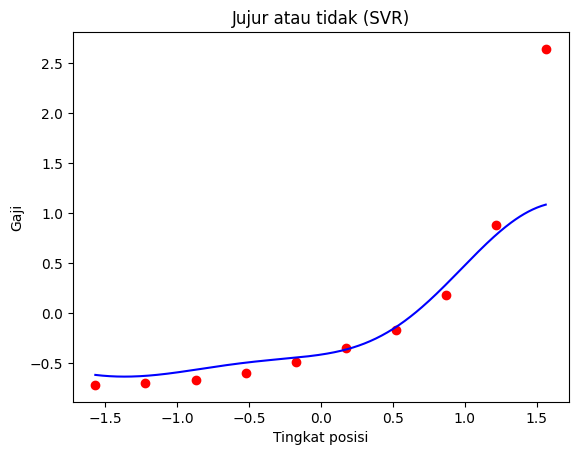

In [21]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

**6. Prediksi Hasil:**
* Membuat array 2D yang berisi tingkat posisi yang akan diprediksi. Dalam contoh ini, tingkat posisi 6.5.
* Menskalakan fitur prediksi menggunakan `sc_X.transform`.
* Melakukan prediksi menggunakan model SVR yang telah dilatih.
* Mengembalikan hasil prediksi ke dalam skala aslinya menggunakan `sc_y.inverse_transform`.

In [22]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

**7. Menampilkan Hasil:**

Menampilkan hasil prediksi gaji untuk tingkat posisi 6.5 dalam kode

In [23]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


**8. Validasi Hasil:**

Hasil output Gambar 3.10 adalah grafik dari model Support Vector Regression (SVR) yang telah dilatih untuk memprediksi gaji berdasarkan tingkat posisi. Grafik tersebut merupakan visualisasi dari hubungan antara tingkat posisi (x-axis) dan gaji (y-axis) setelah menerapkan model SVR.

**Grafik SVR:**

* Pada grafik tersebut, titik-titik merah mewakili data pengamatan asli yang digunakan untuk melatih model.
* Garis biru adalah hasil dari prediksi model SVR. Garis ini mencoba untuk mengikuti pola data asli sebaik mungkin dan merupakan representasi dari hubungan non-linear antara tingkat posisi dan gaji.

Hasil prediksi yang ditampilkan adalah prediksi gaji untuk tingkat posisi 6.5. Hasilnya adalah sekitar $170,370.02. Ini berarti model SVR memperkirakan bahwa seseorang dengan tingkat posisi 6.5 akan memiliki gaji sekitar $170,370.02 berdasarkan pola hubungan yang ditemukan dalam data latihan.

Grafik ini memvisualisasikan bagaimana model SVR mencoba untuk menyesuaikan diri dengan data yang ada dan memberikan prediksi yang sesuai berdasarkan tingkat posisi yang diberikan (6.5 dalam hal ini). Dalam prakteknya, Anda dapat menggunakan model ini untuk membuat prediksi gaji berdasarkan tingkat posisi lainnya dengan mengganti nilai `tingkat_posisi_prediksi`.

**9. Evaluasi Model SVR**

Langkah terakhir adalah melakukan evaluasi model meliputi MAE, MSE dan R-squared

In [24]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


# **Tugas Praktikum**
---
Tugas Praktikum: Multiple Linear Regression dengan Dataset Medical Cost Personal Datasets

**Instruksi Umum:**

1. Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.
2. Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.

[insurance.csv](https://3041032130-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2F5CvtE8Xh9b75jKUaRr5Y%2Fuploads%2Fm9cBZ7dbD9fZdm19VWFs%2Finsurance.csv?alt=media&token=f9e26d69-3bf9-4cd4-84d9-014eef365947)

**Tugas 1: Multiple Linear Regression**

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

3. Lakukan feature scaling jika diperlukan.

4. Buat model multiple linear regression menggunakan Scikit-Learn.

5. Latih model pada data latih dan lakukan prediksi pada data uji.

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

**Catatan Tambahan:**

* Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.
* Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.
* Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.

**Langkah 1 — Import library**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

Bagian ini digunakan untuk mengimpor library yang dibutuhkan dalam analisis:

pandas → untuk mengelola data dalam bentuk tabel (DataFrame).

numpy → untuk perhitungan numerik.

matplotlib.pyplot dan seaborn → untuk membuat visualisasi grafik.

sklearn → digunakan untuk membangun model machine learning, membagi data, dan mengevaluasi hasil.

**Langkah 2 — Baca dataset**

In [26]:
# Ganti path sesuai lokasi file kamu jika perlu
data = pd.read_csv("insurance.csv")

# Lihat 5 data pertama
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Kode ini digunakan untuk membaca file dataset insurance.csv dan menampilkan 5 baris pertama menggunakan head() agar kita bisa melihat struktur datanya (nama kolom, jenis data, dan contoh nilai).

**Langkah 3 — Cek informasi dan nilai hilang**

In [27]:
# Informasi kolom dan tipe datanya
print(data.info())

# Mengecek nilai yang hilang
print("\nJumlah nilai hilang per kolom:")
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Jumlah nilai hilang per kolom:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


data.info() → menampilkan tipe data tiap kolom dan jumlah data yang ada.

data.isnull().sum() → memeriksa apakah ada nilai kosong (missing value) dalam dataset.
Langkah ini penting untuk memastikan data bersih sebelum dianalisis.

**Langkah 4 — Deskripsi statistik dasar**

In [28]:
# Statistik deskriptif
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


Menampilkan statistik deskriptif seperti nilai rata-rata (mean), standar deviasi (std), nilai minimum, maksimum, dan kuartil.
Dengan include='all', kita bisa melihat informasi untuk kolom numerik maupun kategorikal.

**Langkah 5 — Encode variabel kategorikal**

In [29]:
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)
data_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


Model regresi hanya bisa memproses angka, jadi kolom teks (kategori) seperti sex, smoker, dan region perlu diubah menjadi angka dengan metode One-Hot Encoding.

pd.get_dummies() → mengubah kategori menjadi kolom biner (0 atau 1).

drop_first=True → menghindari multikolinearitas dengan menghapus satu kolom dummy dari tiap kategori.

**Langkah 6 — Tentukan variabel fitur (X) dan target (y)**

In [30]:
X = data_encoded.drop(columns=['charges'])  # semua kolom kecuali charges
y = data_encoded['charges']                 # target: biaya medis

X adalah variabel independen (fitur), semua kolom yang akan digunakan untuk memprediksi.

y adalah variabel dependen (target) yaitu charges (biaya medis personal).

**Langkah 7 — Bagi data menjadi train dan test**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Digunakan untuk membagi dataset menjadi dua bagian:

80% data latih (train) → untuk melatih model.

20% data uji (test) → untuk menguji kemampuan model memprediksi data baru.
random_state=42 memastikan hasil pembagian tetap sama setiap kali dijalankan.

**Langkah 8 — Buat dan latih model regresi linier**

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Membuat objek model Linear Regression.

fit() digunakan untuk melatih model menggunakan data latih (X_train, y_train).

**Langkah 9 — Lakukan prediksi**

In [33]:
y_pred = model.predict(X_test)

Setelah model dilatih, kita gunakan untuk memprediksi biaya medis pada data uji (X_test).
Hasil prediksi disimpan pada variabel y_pred.

**Langkah 10 — Evaluasi model**

In [34]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R-squared:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

R-squared: 0.7835929767120724
MSE: 33596915.85136145
RMSE: 5796.284659276273
MAE: 4181.19447375365


Digunakan untuk mengukur performa model dengan beberapa metrik:

R² (R-squared) → seberapa besar variasi target bisa dijelaskan oleh model (semakin tinggi semakin baik).

MSE (Mean Squared Error) → rata-rata kesalahan kuadrat.

RMSE → akar dari MSE, menunjukkan rata-rata jarak prediksi dari nilai sebenarnya.

MAE (Mean Absolute Error) → rata-rata kesalahan absolut.

**Langkah 11 — Lihat koefisien model**

In [35]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print("Intercept:", model.intercept_)
coef_df

Intercept: -11931.21905032666


,Feature,Coefficient
0,age,256.975706
1,bmi,337.092552
2,children,425.278784
3,sex_male,-18.591692
4,smoker_yes,23651.128856
5,region_northwest,-370.677326
6,region_southeast,-657.864297
7,region_southwest,-809.799354


Menampilkan koefisien regresi tiap fitur dan nilai intercept.

Koefisien positif → fitur meningkatkan nilai charges.

Koefisien negatif → fitur menurunkan nilai charges.

**Langkah 12 — Heatmap korelasi antar variabel numerik**

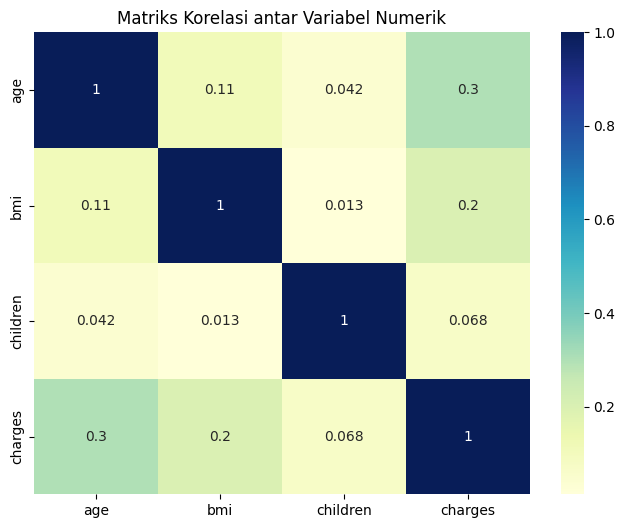

In [36]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.title("Matriks Korelasi antar Variabel Numerik")
plt.show()

Menampilkan hubungan (korelasi) antar variabel numerik menggunakan heatmap.
Semakin tinggi nilai korelasi (+1 atau -1), semakin kuat hubungan antar variabel.

**Langkah 13 — Visualisasi hasil prediksi**

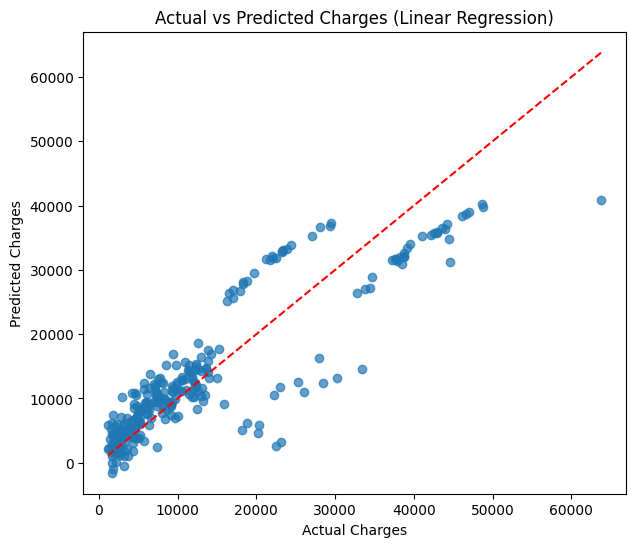

In [37]:
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges (Linear Regression)")
plt.show()

Menampilkan perbandingan antara nilai aktual dan nilai prediksi.
Jika model bagus, titik-titik akan berada dekat dengan garis merah diagonal (prediksi ≈ aktual).

**Langkah 14 — Plot residual**

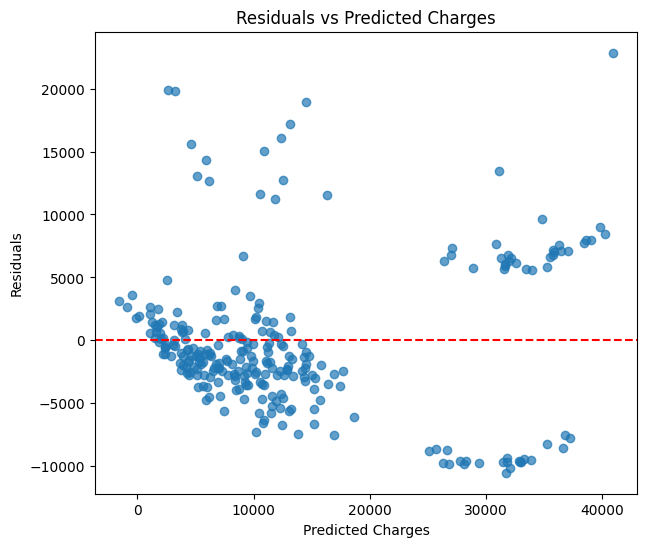

In [38]:
residuals = y_test - y_pred

plt.figure(figsize=(7,6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Charges")
plt.show()

Menampilkan residual (selisih antara aktual dan prediksi).
Jika model bagus, sebaran residual akan acak di sekitar garis 0 tanpa pola tertentu.

**Langkah 15 — Histogram residual**

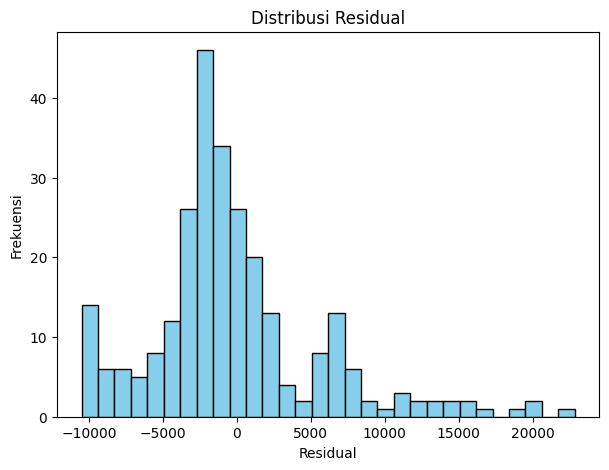

In [39]:
plt.figure(figsize=(7,5))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribusi Residual")
plt.xlabel("Residual")
plt.ylabel("Frekuensi")
plt.show()

Menunjukkan distribusi dari nilai residual.
Jika model linier cocok, maka bentuk histogram akan simetris dan mendekati normal (lonceng).